# <div class="text-center"> Fundamentos de Machine Learning</div>


### <div class="text-center">***LABORATORIO 2019***</div>

---

![DevIt](logo.jpg)

---
<div class="text-center"> Andrea Correa </div>
<div class="text-center">María Laura Gayo </div>
<div class="text-center"> Mariano Koci </div>
<div class="text-center">Alejandro Wohlwend </div>
<div class="text-center">Renzo Daset </div>
<div class="text-center">Laura Rodríguez </div>

---






<a id='Indice'></a>
### Índice

1. [Objetivo](#Objetivo)

2. [Realidad Planteada](#Realidad)

3. [Requerimientos Planteados](#Requerimientos)

4. [Adquisición de datos](#Adquisicion-Datos)
    4. [Dependencias](#Dependencias)
    4. [Import de CSV](#Import-CSV)

5. [Transformación de los datos](#Transformacion)
    5. [Transformación de Monedas](#Transformación-Moneda)
    5. [Descartando columnas no utilizadas](#Descartadas)
    5. [Agrupación de posiciones](#Posiciones)    
    5. [Limpieza de valores inválidos](#Transformación-Inválidos)
    
6. [Creación de Datasets](#Datasets)
    6. [Dataset para Goalkeepers](#Goalkeepers)
    6. [Dataset para CentralDefenders](#CentralDefenders)
    6. [Dataset para Right/Left Backs](#Right/LeftBacks)
    6. [Dataset para Right/Left Winger Backs](#Right/LeftWingerBacks)
    6. [Dataset para Center Defender Midfielders](#CenterDefenderMidfielders)
    6. [Dataset para Central Midfielders](#CentralMidfielders)
    6. [Dataset para Left/Right Central Midfielders](#Left/RightCentralMidfielders)
    6. [Dataset para Central Attacking Midfielders](#CentralAttackingMidfielders)
    6. [Dataset para Left/Right Midfielders](#Left/RightMidfielders)
    6. [Dataset para Left/Right Attacking Wingers](#Left/RightAttackingWingers)
    6. [Dataset para Center/Left/Right Forwarders](#Center/Left/RightForwarders)
    6. [Dataset para Strikers](#Strikers)
  

7. [Pre-procesamiento de datos para optimizar el algoritmo.](#Pre)

8. [Evaluación del algoritmo](#Evaluación)

---

<a id='Objetivo'></a>
# Objetivo
---
[Inicio ▲](#Indice)

Esta tarea pretende la puesta en práctica y profundización de los siguientes puntos vistos en el taller:
- Pre-procesar los datos para un algoritmo de Machine Learning
- Aplicar un algoritmo de Machine Learning a un caso de estudio
- Evaluar los resultados del algoritmo y extraer conclusiones

<a id='Realidad'></a>
# Realidad planteada
---
[Inicio ▲](#Indice)

Un jugador de FIFA 2019 online quiere construir un equipo competitivo y para ello quiere
predecir el valor de los jugadores en base a sus estadísticas, para de esta forma poder
armar un equipo sin perder dinero. Para ello se utiliza un conjunto de datos [1] escrapeado
de [2].

<a id='Requerimientos'></a>
# Requerimientos planteados
---
[Inicio ▲](#Indice)

- La ingesta de los datos desde los archivos .csv y .xml a un DataFrame de R.
- Validación y limpieza de datos.
- Análisis del conjunto de datos.
- Pre-procesamiento de los datos para obtener los mejores resultados del algoritmo.
- Evaluar el algoritmo con las técnicas vistas en el taller.


<a id='Adquisicion-Datos'></a>
# Adquisición de datos
---

<a id='Dependencias'></a>
## Dependencias
[Inicio ▲](#Indice)

In [1]:
install.packages("mice")
install.packages("lattice")
install.packages("dplyr")
install.packages("e1071")
install.packages("caret")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("naniar")
install.packages("DataExplorer")


package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Maria Laura\AppData\Local\Temp\RtmpUnQKp4\downloaded_packages
package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Maria Laura\AppData\Local\Temp\RtmpUnQKp4\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Maria Laura\AppData\Local\Temp\RtmpUnQKp4\downloaded_packages
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Maria Laura\AppData\Local\Temp\RtmpUnQKp4\downloaded_packages
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Maria Laura\AppData\Local\Temp\RtmpUnQKp4\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Maria Laura\AppData\Local\Temp\RtmpUnQK

In [2]:
library(dplyr)
library(lattice)
library(ggplot2)
library(e1071)
library(caret)
library(DataExplorer)
library(tidyverse)
library(naniar)
library(mice)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()

Attaching package: 'mice'

The following object is masked from 'package:tidyr':

    complete

The following objects are masked from 'package:base':

    cbind, rbind



### Biblioteca caret para R
**caret** es un acrónimo para **C** lassification  **A**nd **RE**gression **T**raining (Entrenamiento de Regresión y Clasificación).

- Caret nos permite acelerar nuestro trabajo proveyendo una interfaz común a cientos de algoritmos de Machine Learning: 
    - Este paquete nos permite utilizar más de 200 algoritmos de Machine Learning distintos.
    - Funciones para dividir los datos y muestrear los datos (Data splitting/sampling). 
    - Seleccionar características (Feature selection).
    - Tuneo de modelos.

Documentación de caret: http://topepo.github.io/caret/index.html

### Biblioteca e1071
**e1071** implementa varios algoritmos de Mahchine Learning que se pueden acceder con caret.

### Dataset **FIFA 2019**
Para este trabajo vamos a utilizar el un conjunto de datos de jugadores del juego FIFA 2019. https://www.kaggle.com/karangadiya/fifa19

Este dataset contiene informacion de los distintos jugadores del video juego FIFA 2019. El mismo contiene estadísticas de los distintos jugadores de fútbol que están en el juego.

En esta tarea vamos a intentar predecir el valor de los jugadores a partir de las distintas estadísticas.


<a id='Import-CSV'></a>
### Import-CSV
[Inicio ▲](#Indice)

In [3]:
# Defino url del archivo csv
fifa_url <- 'datasets/fifa19.csv'

# cargo el dataset en un dataframe
fifa <- read.table(fifa_url, sep = ",", header = TRUE, quote = "\"", encoding="UTF-8")

Observamos los datos antes de hacerles cualquier preprocesamiento

In [4]:
summary(fifa)

       X               ID                   Name            Age       
 Min.   :    0   Min.   :    16   J. Rodríguez:   11   Min.   :16.00  
 1st Qu.: 4552   1st Qu.:200316   Paulinho    :    8   1st Qu.:21.00  
 Median : 9103   Median :221759   J. Williams :    7   Median :25.00  
 Mean   : 9103   Mean   :214298   R. Williams :    7   Mean   :25.12  
 3rd Qu.:13654   3rd Qu.:236530   Felipe      :    6   3rd Qu.:28.00  
 Max.   :18206   Max.   :246620   J. Gómez    :    6   Max.   :45.00  
                                  (Other)     :18162                  
                                            Photo          Nationality   
 https://cdn.sofifa.org/players/4/19/100803.png:    1   England  : 1662  
 https://cdn.sofifa.org/players/4/19/100899.png:    1   Germany  : 1198  
 https://cdn.sofifa.org/players/4/19/101317.png:    1   Spain    : 1072  
 https://cdn.sofifa.org/players/4/19/101473.png:    1   Argentina:  937  
 https://cdn.sofifa.org/players/4/19/101488.png:    1   France

<a id='Transformacion'></a>

# Transformación de los datos
---
[Inicio ▲](#Indice)

Descartamos columnas que no son útiles para el aprendizaje: IDs y URLs

In [5]:
fifa <- select(fifa,-c('X', 'ID', 'Flag', 'Photo', 'Club.Logo'))


<a id='Transformación-Moneda'></a>
### Transformación de Monedas
[Inicio ▲](#Indice)

Convertimos a numéricos los valores sacandoles el símbolo de euros y los K y M al final, de miles y millones respectivamente.

In [6]:
value_wage <- function(df_value) {
      value<- substr(df_value[[1]], start=2, stop=nchar(df_value[[1]])-1)
      end  <- substr(df_value[[1]], start=nchar(df_value[[1]]), stop=nchar(df_value[[1]]))
      if (identical(end, "M")) {
        value <- as.numeric(value) * 1000000 
      } else if (identical(end, 'K')) {
        value <- as.numeric(value) * 1000
      } else {
        value <- 0
      }
      return(value)
}

fifa['Value'] <- apply(select(fifa, 'Value'), 1, value_wage)
fifa['Wage'] <- apply(select(fifa, 'Wage'), 1, value_wage)
fifa['Release.Clause'] <- apply(select(fifa, 'Release.Clause'), 1, value_wage)

<a id='Descartadas'></a>
### Descartando columnas no utilizadas
[Inicio ▲](#Indice)

Descartamos algunas columnas que no vamos a utilizar

In [7]:
fifa <- select(fifa, -c('LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 
                        'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
                        'LCB', 'CB', 'RCB', 'RB'))
summary(fifa)

           Name            Age           Nationality       Overall     
 J. Rodríguez:   11   Min.   :16.00   England  : 1662   Min.   :46.00  
 Paulinho    :    8   1st Qu.:21.00   Germany  : 1198   1st Qu.:62.00  
 J. Williams :    7   Median :25.00   Spain    : 1072   Median :66.00  
 R. Williams :    7   Mean   :25.12   Argentina:  937   Mean   :66.24  
 Felipe      :    6   3rd Qu.:28.00   France   :  914   3rd Qu.:71.00  
 J. Gómez    :    6   Max.   :45.00   Brazil   :  827   Max.   :94.00  
 (Other)     :18162                   (Other)  :11597                  
   Potential                    Club           Value                Wage       
 Min.   :48.00                    :  241   Min.   :        0   Min.   :     0  
 1st Qu.:67.00   Arsenal          :   33   1st Qu.:   300000   1st Qu.:  1000  
 Median :71.00   AS Monaco        :   33   Median :   675000   Median :  3000  
 Mean   :71.31   Atlético Madrid  :   33   Mean   :  2410696   Mean   :  9731  
 3rd Qu.:75.00   Borussi

In [8]:
unique(fifa$Position)

[1] RF  ST  LW  GK  RCM LF  RS  RCB LCM CB  LDM CAM CDM LS  LCB RM  LAM LM  LB 
[20] RDM RW  CM  RB  RAM CF  RWB LWB    
28 Levels:  CAM CB CDM CF CM GK LAM LB LCB LCM LDM LF LM LS LW LWB RAM ... ST

## Ahora vamos a trabajar un poco en las features

**>>>>>>>>>>>>>>>>> (revisar)**
---
En el dataset claramente tenemos features que no son numéricas, a este tipo de features es necesario transformarlas para llevarlas a algo numérico, para esto recurrimos a one_hot_encoding que nos permite llevar a numérico features no numéricas, esto se hace creando una columna nueva por cada uno de los valores posibles que puede tomar la feature.

Pare ello recurrimos a la función dummyVars

In [9]:
# aplicamos one hot enconding a Preferred.Foot es decir si es diestro o zurdo
dmy <- dummyVars(" ~ .", data = fifa['Preferred.Foot'])
dmy <- data.frame(predict(dmy, newdata = fifa))
# agregamos las columnas nuevas al dataframe
fifa[colnames(dmy)] <- dmy
# descartamos la columna vieja
fifa <- select(fifa,-c('Preferred.Foot.'))

In [10]:
head(fifa)

Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred.Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause,Preferred.Foot.Left,Preferred.Foot.Right
L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,2202,Left,...,28,26,6,11,15,14,8,226500000,1,0
Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,2228,Right,...,31,23,7,11,15,14,11,127100000,0,1
Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,2143,Right,...,24,33,9,9,15,15,11,228100000,0,1
De Gea,27,Spain,91,93,Manchester United,72000000,260000,1471,Right,...,21,13,90,85,87,88,94,138600000,0,1
K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,2281,Right,...,58,51,15,13,5,10,13,196400000,0,1
E. Hazard,27,Belgium,91,91,Chelsea,93000000,340000,2142,Right,...,27,22,11,12,6,8,8,172100000,0,1


Antes de aplicar el procedimiento anterior a las distintas variables categóricas hay que tener en cuenta que si la cantidad de valores posibles para una columna es muy alta, puede darnos problemas (de memoria y dificultad para que el algoritmo aprenda), por lo tanto hay que crear agrupaciones o descartar la columna.

<a id='Posiciones'></a>
### Agrupación de posiciones
[Inicio ▲](#Indice)

Agrupamos las posiciones de los jugadores en una manera más sencilla

In [11]:
simple_position <- function(df) {
    value <- df['Position'][[1]]
    if (identical(value, 'GK')) {
        return('GK')
    } else if (identical(value, 'CB') | identical(value, 'LCB') |
              identical(value, 'RCB')) {
        return('CB')
    } else if(identical(value, 'RB') | identical(value, 'LB')) {
        return('RLB')
    } else if(identical(value, 'RWB') | identical(value, 'LWB')) {
        return('LRWB')          
    } else if (identical(value, 'LDM') | identical(value, 'RDM')) {
        return('LRDM')
    } else if(identical(value, 'RCM') | identical(value, 'LCM')
             | identical(value, 'CM')){
        return('CM')
    } else if (identical(value, 'LM') | identical(value, 'RM')) {
        return('LRM')
    } else if (identical(value, 'LW') | identical(value, 'RW')
              | identical(value, 'LAM') | identical(value, 'RAM')) {
        return('LRAW')
    } else if (identical(value, 'CF') | identical(value, 'LF') | identical(value, 'RF')) {
        return('CLRF')
    } else if (identical(value, 'RS') | identical(value, 'LS') | identical(value, 'ST')) {
        return('ST')
    } else {
        return(value)
    }
}

fifa['Position'] <- apply(fifa, 1, simple_position)

In [12]:
str(fifa)

'data.frame':	18207 obs. of  60 variables:
 $ Name                    : Factor w/ 17194 levels "A. Ábalos","A. Abang",..: 9676 3192 12552 4169 8661 4458 9684 9892 15466 7822 ...
 $ Age                     : int  31 33 26 27 27 27 32 31 32 25 ...
 $ Nationality             : Factor w/ 164 levels "Afghanistan",..: 7 124 21 141 14 14 36 159 141 138 ...
 $ Overall                 : int  94 94 92 91 91 91 91 91 91 90 ...
 $ Potential               : int  94 94 93 93 92 91 91 91 91 93 ...
 $ Club                    : Factor w/ 652 levels ""," SSV Jahn Regensburg",..: 215 330 437 377 376 138 474 215 474 62 ...
 $ Value                   : num  1.10e+08 7.70e+07 1.18e+08 7.20e+07 1.02e+08 ...
 $ Wage                    : num  565000 405000 290000 260000 355000 340000 420000 455000 380000 94000 ...
 $ Special                 : int  2202 2228 2143 1471 2281 2142 2280 2346 2201 1331 ...
 $ Preferred.Foot          : Factor w/ 3 levels "","Left","Right": 2 3 3 3 3 3 3 3 3 3 ...
 $ International.Rep

**NOTA**: Antes de seguir adelante, se realizan las limpiezas de datos necesarias.

<a id='Transformación-Inválidos'></a>
### Limpieza de valores inválidos
[Inicio ▲](#Indice)

In [13]:
# Se remplazan los datos vacíos por NA
fifaClean <- mutate_all(fifa, funs(na_if(.,"")))
profile_missing(fifaClean)

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session."

feature,num_missing,pct_missing
Name,0,0.000000000
Age,0,0.000000000
Nationality,0,0.000000000
Overall,0,0.000000000
Potential,0,0.000000000
Club,241,0.013236667
Value,0,0.000000000
Wage,0,0.000000000
Special,0,0.000000000
Preferred.Foot,48,0.002636349


In [14]:
## nueva línea para Cantidad de valores $0
colSums(is.na(fifaClean))

Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential                     Club 
                       0                        0                      241 
                   Value                     Wage                  Special 
                       0                        0                        0 
          Preferred.Foot International.Reputation                Weak.Foot 
                      48                       48                       48 
             Skill.Moves                Work.Rate                Body.Type 
                      48                       48                       48 
               Real.Face                 Position            Jersey.Number 
                      48                       60                       60 
                  Joined              Loaned.From     Contract.Valid.Until 
                    1553                    16943                      289 
                  Height                   Weight                 Crossing 
                      48                       48                       48 
               Finishing          HeadingAccuracy             ShortPassing 
                      48                       48                       48 
                 Volleys                Dribbling                    Curve 
                      48                       48                       48 
              FKAccuracy              LongPassing              BallControl 
                      48                       48                       48 
            Acceleration              SprintSpeed                  Agility 
                      48                       48                       48 
               Reactions                  Balance                ShotPower 
                      48                       48                       48 
                 Jumping                  Stamina                 Strength 
                      48                       48                       48 
               LongShots               Aggression            Interceptions 
                      48                       48                       48 
             Positioning                   Vision                Penalties 
                      48                       48                       48 
               Composure                  Marking           StandingTackle 
                      48                       48                       48 
           SlidingTackle                 GKDiving               GKHandling 
                      48                       48                       48 
               GKKicking            GKPositioning               GKReflexes 
                      48                       48                       48 
          Release.Clause      Preferred.Foot.Left     Preferred.Foot.Right 
                       0                        0                        0

In [15]:
unique(fifaClean)

Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred.Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause,Preferred.Foot.Left,Preferred.Foot.Right
L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,2202,Left,...,28,26,6,11,15,14,8,226500000,1,0
Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,2228,Right,...,31,23,7,11,15,14,11,127100000,0,1
Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,2143,Right,...,24,33,9,9,15,15,11,228100000,0,1
De Gea,27,Spain,91,93,Manchester United,72000000,260000,1471,Right,...,21,13,90,85,87,88,94,138600000,0,1
K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,2281,Right,...,58,51,15,13,5,10,13,196400000,0,1
E. Hazard,27,Belgium,91,91,Chelsea,93000000,340000,2142,Right,...,27,22,11,12,6,8,8,172100000,0,1
L. Modric,32,Croatia,91,91,Real Madrid,67000000,420000,2280,Right,...,76,73,13,9,7,14,9,137400000,0,1
L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000,455000,2346,Right,...,45,38,27,25,31,33,37,164000000,0,1
Sergio Ramos,32,Spain,91,91,Real Madrid,51000000,380000,2201,Right,...,92,91,11,8,9,7,11,104600000,0,1
J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000,94000,1331,Right,...,12,18,86,92,78,88,89,144500000,0,1


In [16]:
#Cantidad de valores nulos
summarise_all(fifaClean, funs(sum(is.na(.))))

Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred.Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause,Preferred.Foot.Left,Preferred.Foot.Right
0,0,0,0,0,241,0,0,0,48,...,48,48,48,48,48,48,48,0,0,0


In [17]:
#Limpiamos valores nulos
fifaNotNull <- na.omit(fifaClean)
summarise_all(fifaNotNull, funs(sum(is.na(.))))

Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred.Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause,Preferred.Foot.Left,Preferred.Foot.Right
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Como vemos en la celda anterior, al eliminar las filas con valores nulos, queda el dataset vacío. 
Al haber tomado la decisión de separar el dataset por posición, seleccionando las variables relevantes a cada posición, realizaremos el análisis de campos vacíos en cada dataset.

<a id='Datasets'></a>

# Creación de Datasets
---
[Inicio ▲](#Indice)

<a id='Goalkeepers'></a>
### Dataset para Goalkeepers

In [18]:
#Dataset para Goalkeepers
fifaGK <- fifaClean %>% filter(Position == "GK")%>% 
                   select(Age, Overall, Potential,GKDiving,GKHandling,
                          GKKicking,GKPositioning,GKReflexes, Reactions, International.Reputation, Value) 
head(fifaGK)
colSums(is.na(fifaGK))
fifaGKceroValue <- fifaGK %>% filter(fifaGK$Value == 0)

Age,Overall,Potential,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Reactions,International.Reputation,Value
27,91,93,90,85,87,88,94,90,4,72000000
25,90,93,86,92,78,88,89,86,3,68000000
26,89,92,87,85,88,85,90,85,3,58000000
26,89,90,85,91,72,86,88,84,4,53500000
32,89,89,90,86,91,87,87,84,5,38000000
31,88,88,88,84,68,83,92,85,4,36000000


Age                  Overall                Potential 
                       0                        0                        0 
                GKDiving               GKHandling                GKKicking 
                       0                        0                        0 
           GKPositioning               GKReflexes                Reactions 
                       0                        0                        0 
International.Reputation                    Value 
                       0                        0

Observamos si existen jugadores con Value = 0.

In [19]:
head(fifaGKceroValue)

Age,Overall,Potential,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Reactions,International.Reputation,Value
26,79,81,80,73,65,77,85,76,1,0
41,77,77,75,75,74,78,77,73,2,0
32,73,73,68,70,65,77,77,69,1,0
30,73,73,75,71,71,73,72,70,1,0
22,72,72,71,70,62,70,72,73,1,0
27,72,73,73,67,70,70,74,68,1,0


In [20]:
# aplicamos PCA al dataset de goleros todas las columnas menos la 1 y 2, es decir "Name" y "Nationality"
names(fifaGK)
fifaGK.pca <- prcomp(fifaGK [c(1:11)], center = TRUE,scale. = TRUE)
summary(fifaGK.pca)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "GKDiving"                
 [5] "GKHandling"               "GKKicking"               
 [7] "GKPositioning"            "GKReflexes"              
 [9] "Reactions"                "International.Reputation"
[11] "Value"

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.6990 1.1459 0.93125 0.63222 0.58234 0.51687 0.46160
Proportion of Variance 0.6622 0.1194 0.07884 0.03634 0.03083 0.02429 0.01937
Cumulative Proportion  0.6622 0.7816 0.86044 0.89678 0.92761 0.95189 0.97126
                           PC8     PC9    PC10    PC11
Standard deviation     0.36294 0.30966 0.29512 0.03750
Proportion of Variance 0.01198 0.00872 0.00792 0.00013
Cumulative Proportion  0.98324 0.99195 0.99987 1.00000

A partir de lo anterior observamos que las variables que más influyen son la edad ("Age") y puntaje ("Overall")

In [21]:
summary(fifaGK)

      Age           Overall       Potential       GKDiving       GKHandling   
 Min.   :16.00   Min.   :47.0   Min.   :48.0   Min.   :45.00   Min.   :43.00  
 1st Qu.:22.00   1st Qu.:59.0   1st Qu.:65.0   1st Qu.:60.00   1st Qu.:58.00  
 Median :25.00   Median :64.0   Median :69.0   Median :65.00   Median :63.00  
 Mean   :26.04   Mean   :64.6   Mean   :69.8   Mean   :65.32   Mean   :62.87  
 3rd Qu.:30.00   3rd Qu.:69.0   3rd Qu.:74.0   3rd Qu.:70.00   3rd Qu.:68.00  
 Max.   :45.00   Max.   :91.0   Max.   :93.0   Max.   :90.00   Max.   :92.00  
   GKKicking     GKPositioning     GKReflexes     Reactions    
 Min.   :35.00   Min.   :38.00   Min.   :44.0   Min.   :30.00  
 1st Qu.:56.00   1st Qu.:57.00   1st Qu.:60.0   1st Qu.:52.00  
 Median :61.00   Median :63.00   Median :66.0   Median :60.00  
 Mean   :61.48   Mean   :63.05   Mean   :66.1   Mean   :58.93  
 3rd Qu.:66.00   3rd Qu.:69.00   3rd Qu.:72.0   3rd Qu.:67.00  
 Max.   :91.00   Max.   :90.00   Max.   :94.0   Max.   :90.00  

In [22]:
dim(fifaGK)

[1] 2025   11

In [23]:
set.seed(1500)
indexes <- createDataPartition(fifaGK$Value,times = 1,
                               p = 0.8, # 80% para entrenar, 20% para evaluar
                               list = FALSE)
fifaGK.train <- fifaGK[indexes,]
fifaGK.test <- fifaGK[-indexes,]

In [24]:
#Verificamos los subconjuntos
names(fifaGK.train)
dim(fifaGK.train)

names(fifaGK.test)
dim(fifaGK.test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "GKDiving"                
 [5] "GKHandling"               "GKKicking"               
 [7] "GKPositioning"            "GKReflexes"              
 [9] "Reactions"                "International.Reputation"
[11] "Value"

[1] 1621   11

[1] "Age"                      "Overall"                 
 [3] "Potential"                "GKDiving"                
 [5] "GKHandling"               "GKKicking"               
 [7] "GKPositioning"            "GKReflexes"              
 [9] "Reactions"                "International.Reputation"
[11] "Value"

[1] 404  11

Verificamos que la suma de la cantidad de líneas de fifaGK.train y fifaGK.test es igual a la cantidad total de lineas de fifaGK

In [25]:
nrow(fifaGK.train) + nrow(fifaGK.test) == nrow(fifaGK)

[1] TRUE

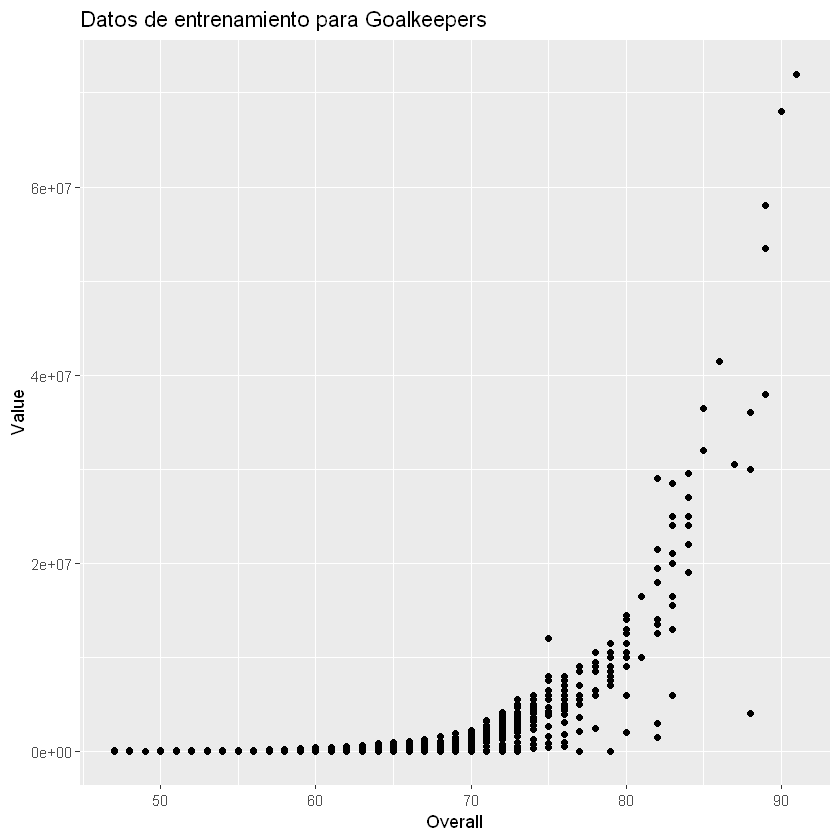

In [26]:
ggplot() + geom_point(data = fifaGK.train, aes(x = Overall, y = Value)) + 
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Datos de entrenamiento para Goalkeepers")

In [27]:
set.seed(1500)
regresor <- lm(Value ~ Overall, data = fifaGK.train)

In [28]:
str(fifaGK.train)

'data.frame':	1621 obs. of  11 variables:
 $ Age                     : int  27 25 26 26 32 31 33 40 31 24 ...
 $ Overall                 : int  91 90 89 89 89 88 88 88 87 86 ...
 $ Potential               : int  93 93 92 90 89 88 88 88 87 90 ...
 $ GKDiving                : int  90 86 87 85 90 88 87 88 90 85 ...
 $ GKHandling              : int  85 92 85 91 86 84 86 87 81 80 ...
 $ GKKicking               : int  87 78 88 72 91 68 69 74 75 91 ...
 $ GKPositioning           : int  88 88 85 86 87 83 89 90 82 82 ...
 $ GKReflexes              : int  94 89 90 88 87 92 89 83 90 87 ...
 $ Reactions               : int  90 86 85 84 84 85 83 79 84 86 ...
 $ International.Reputation: int  4 3 3 4 5 4 3 4 3 2 ...
 $ Value                   : num  72000000 68000000 58000000 53500000 38000000 36000000 30000000 4000000 30500000 41500000 ...


In [29]:
y_predict <- predict(regresor, fifaGK.train)

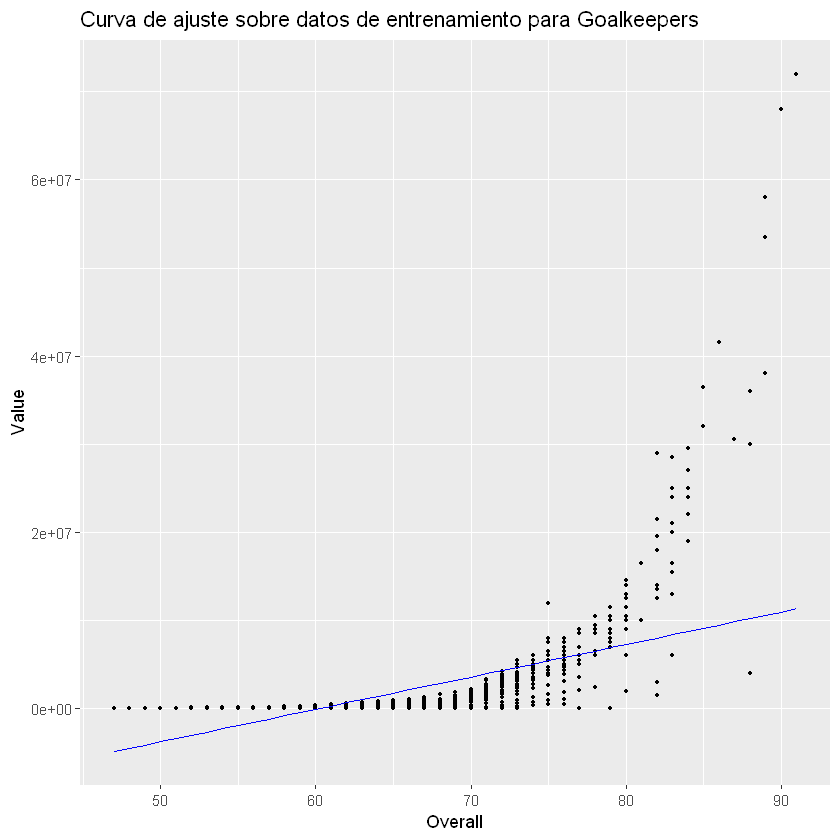

In [30]:
ggplot() + geom_point(data = fifaGK.train, aes(x = Overall, y = Value), size = 0.9) +
  geom_line(aes( x = fifaGK.train$Overall, y = y_predict), color = "blue") +
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Curva de ajuste sobre datos de entrenamiento para Goalkeepers")

In [31]:
y_test_predict <- predict(regresor, fifaGK.test)


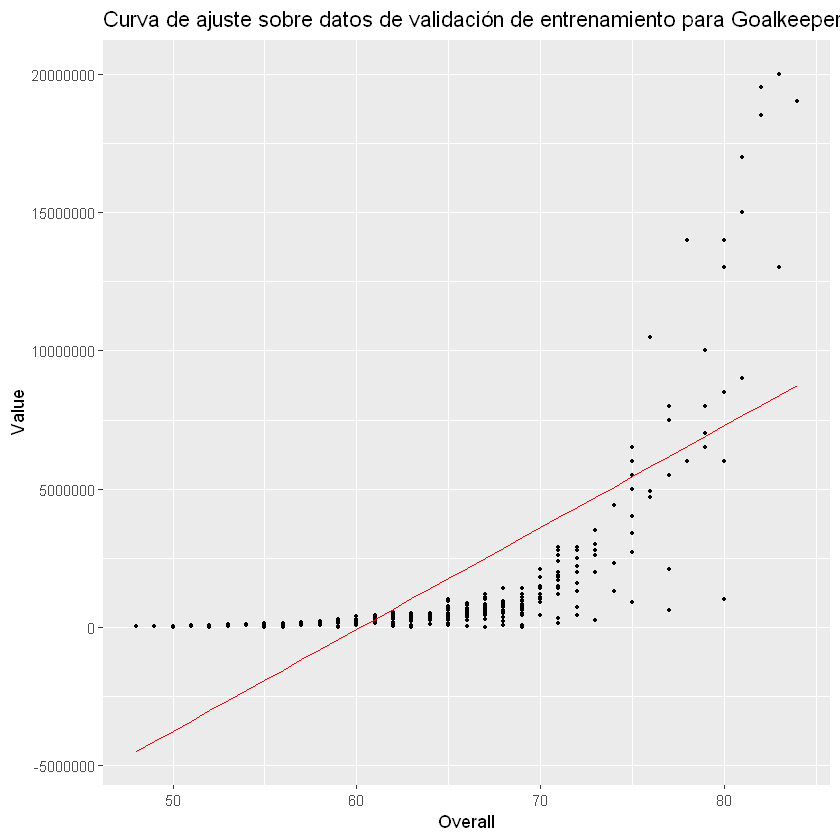

In [32]:
ggplot() + geom_point(data = fifaGK.test, aes(x = Overall, y = Value), size = 0.9) +
  geom_line(aes( x = fifaGK.test$Overall, y = y_test_predict), color = "red") +
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Curva de ajuste sobre datos de validación de entrenamiento para Goalkeepers")

In [33]:
cor(fifaGK.test$Value, y_test_predict)
print (regresor)

[1] 0.6523319


Call:
lm(formula = Value ~ Overall, data = fifaGK.train)

Coefficients:
(Intercept)      Overall  
  -22126489       367639  



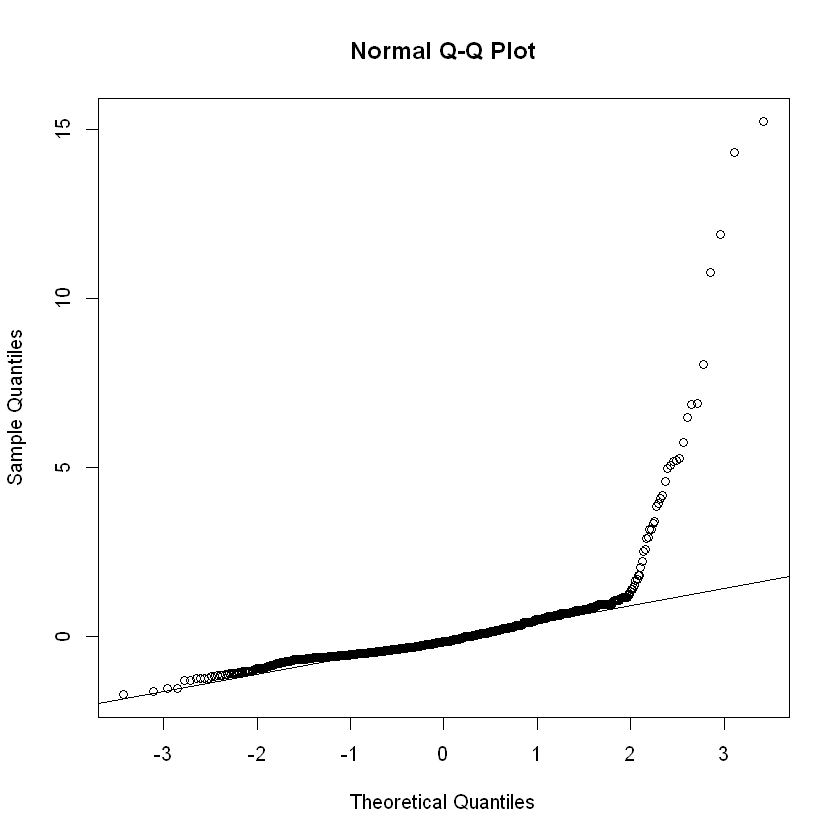

In [34]:
#Diagnóstico del Modelo
residuos <- rstandard(regresor)
qqnorm(residuos)
qqline(residuos)

Vamos a probar si incluyendo más variables las predicción mejora.

In [35]:
#Incluimos todas las variables del data set fifaGK.train
set.seed(1500)
regresorAll <- lm(Value ~ . , data = fifaGK.train)

In [58]:
summary(regresorAll)


Call:
lm(formula = Value ~ ., data = fifaGK.train)

Residuals:
      Min        1Q    Median        3Q       Max 
-19073784  -1129969   -178228    866212  45848315 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -17266196    1349270 -12.797  < 2e-16 ***
Age                        -312344      30446 -10.259  < 2e-16 ***
Overall                    1540396     254217   6.059 1.70e-09 ***
Potential                   -69282      32007  -2.165 0.030565 *  
GKDiving                   -277969      60496  -4.595 4.67e-06 ***
GKHandling                 -189336      58956  -3.212 0.001346 ** 
GKKicking                   -39935      20256  -1.972 0.048830 *  
GKPositioning              -283972      57475  -4.941 8.59e-07 ***
GKReflexes                 -253623      59087  -4.292 1.87e-05 ***
Reactions                  -111004      31121  -3.567 0.000372 ***
International.Reputation   5527225     250492  22.065  < 2e-16 ***
---
Signif. cod

In [36]:
str(fifaGK.train)

'data.frame':	1621 obs. of  11 variables:
 $ Age                     : int  27 25 26 26 32 31 33 40 31 24 ...
 $ Overall                 : int  91 90 89 89 89 88 88 88 87 86 ...
 $ Potential               : int  93 93 92 90 89 88 88 88 87 90 ...
 $ GKDiving                : int  90 86 87 85 90 88 87 88 90 85 ...
 $ GKHandling              : int  85 92 85 91 86 84 86 87 81 80 ...
 $ GKKicking               : int  87 78 88 72 91 68 69 74 75 91 ...
 $ GKPositioning           : int  88 88 85 86 87 83 89 90 82 82 ...
 $ GKReflexes              : int  94 89 90 88 87 92 89 83 90 87 ...
 $ Reactions               : int  90 86 85 84 84 85 83 79 84 86 ...
 $ International.Reputation: int  4 3 3 4 5 4 3 4 3 2 ...
 $ Value                   : num  72000000 68000000 58000000 53500000 38000000 36000000 30000000 4000000 30500000 41500000 ...


In [37]:
y_predictAll <- predict(regresorAll, fifaGK.train)

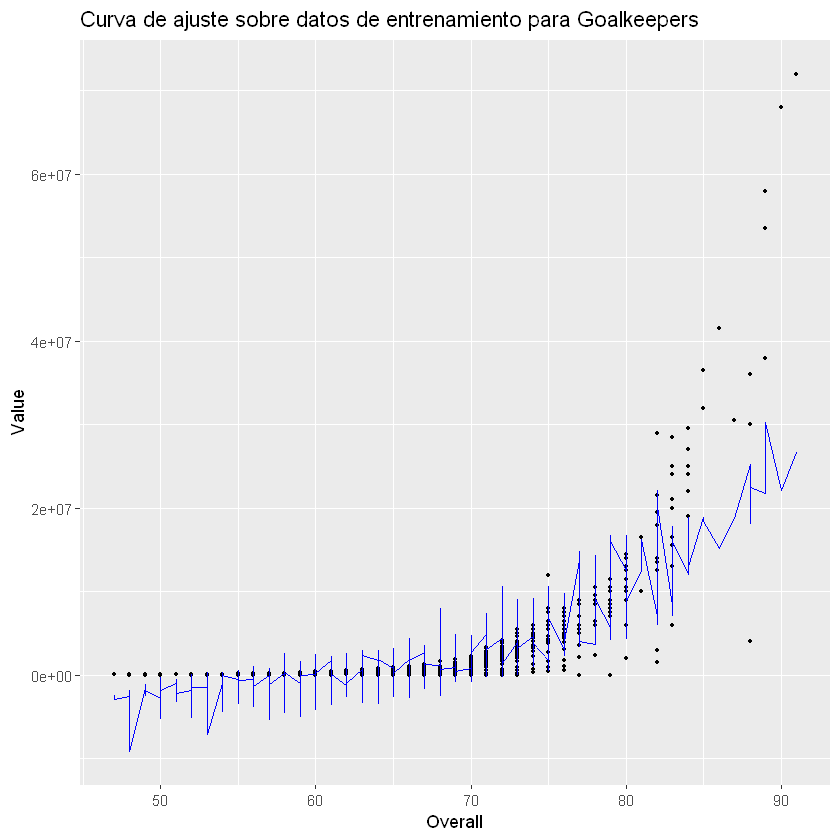

In [38]:
ggplot() + geom_point(data = fifaGK.train, aes(x = Overall, y = Value), size = 0.9) +
  geom_line(aes( x = fifaGK.train$Overall, y = y_predictAll), color = "blue") +
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Curva de ajuste sobre datos de entrenamiento para Goalkeepers")

In [39]:
y_test_predict_all <- predict(regresorAll, fifaGK.test)

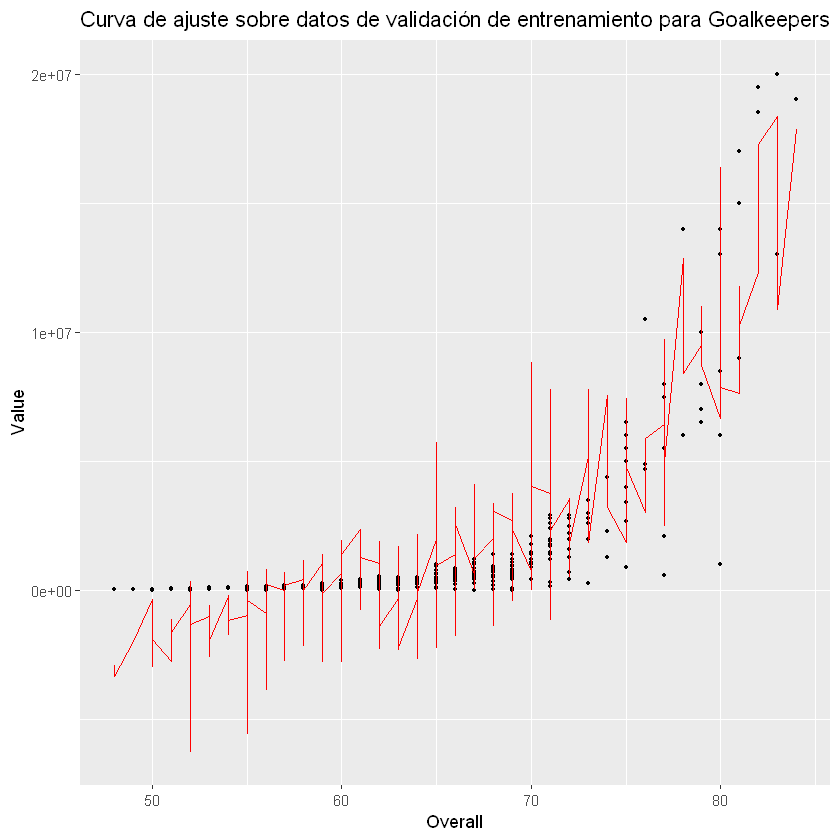

In [40]:
ggplot() + geom_point(data = fifaGK.test, aes(x = Overall, y = Value), size = 0.9) +
  geom_line(aes( x = fifaGK.test$Overall, y = y_test_predict_all), color = "red") +
  xlab("Overall") + 
  ylab("Value") + 
  ggtitle("Curva de ajuste sobre datos de validación de entrenamiento para Goalkeepers")

Para verificar la correlación entre los valores existentes en el modelo y el entreanamiento utilizamos la función cor. A valor más cercano a 1, mejor ajuste de datos.

In [55]:
cor(fifaGK.test$Value, y_test_predict_all)
print (regresorAll)

[1] 0.8170503


Call:
lm(formula = Value ~ ., data = fifaGK.train)

Coefficients:
             (Intercept)                       Age                   Overall  
               -17266196                   -312344                   1540396  
               Potential                  GKDiving                GKHandling  
                  -69282                   -277969                   -189336  
               GKKicking             GKPositioning                GKReflexes  
                  -39935                   -283972                   -253623  
               Reactions  International.Reputation  
                 -111004                   5527225  



Observando el resultado anterior podemos ver que la predicción mejora notablemente cuando se incrementa la cantidad de variables a tener en cuenta para realizar el entrenamiento.

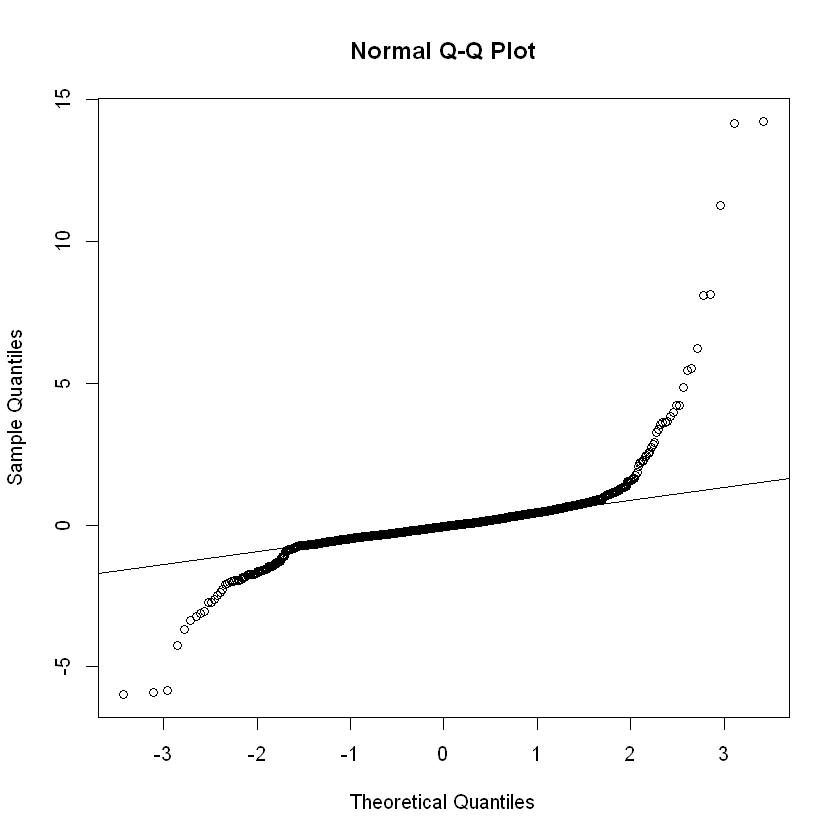

In [57]:
#Diagnóstico del Modelo
residuosAll <- rstandard(regresorAll)
qqnorm(residuosAll)
qqline(residuosAll)

In [60]:
library('boot')


Attaching package: 'boot'

The following object is masked from 'package:lattice':

    melanoma



<a id='CentralDefenders'></a>
### Dataset para Central Defenders

In [42]:
#Dataset para Central Defenders
fifaCB <- fifaClean %>% filter(Position == "CB")%>% 
                   select(Name, Age, Nationality, Overall, Potential,Marking,
                              StandingTackle,SlidingTackle,HeadingAccuracy,Strength, Aggression, Interceptions, ShortPassing,
                          BallControl, Reactions, Jumping, International.Reputation) 
head(fifaCB, 20)
colSums(is.na(fifaCB))

Name,Age,Nationality,Overall,Potential,Marking,StandingTackle,SlidingTackle,HeadingAccuracy,Strength,Aggression,Interceptions,ShortPassing,BallControl,Reactions,Jumping,International.Reputation
Sergio Ramos,32,Spain,91,91,87,92,91,91,83,88,90,78,84,85,93,4
D. Godín,32,Uruguay,90,90,90,89,89,92,88,89,88,79,76,85,91,3
G. Chiellini,33,Italy,89,89,93,93,90,83,89,92,88,59,57,82,89,4
M. Hummels,29,Germany,88,88,88,90,88,87,84,69,92,81,81,87,68,4
Thiago Silva,33,Brazil,88,88,88,89,85,81,82,76,89,80,80,82,90,4
S. Umtiti,24,France,87,92,90,89,86,79,84,81,87,81,77,82,89,3
K. Koulibaly,27,Senegal,87,90,91,88,86,81,94,87,88,66,60,80,81,3
J. Vertonghen,31,Belgium,87,87,90,87,88,80,79,84,89,79,76,84,85,3
Piqué,31,Spain,87,87,91,86,84,83,83,72,88,81,78,84,74,4
V. van Dijk,26,Netherlands,86,88,88,89,84,82,92,81,86,76,73,85,85,3


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential                  Marking 
                       0                        0                        0 
          StandingTackle            SlidingTackle          HeadingAccuracy 
                       0                        0                        0 
                Strength               Aggression            Interceptions 
                       0                        0                        0 
            ShortPassing              BallControl                Reactions 
                       0                        0                        0 
                 Jumping International.Reputation 
                       0                        0

<a id='Right/LeftBacks'></a>
### Dataset para Right/Left Backs

In [43]:
#Dataset para Right/Left Backs
fifaRLB <- fifaClean %>% filter(Position == "RLB")%>% 
                   select(Name, Age, Nationality, Overall, Potential, Marking,
                              StandingTackle, SlidingTackle, HeadingAccuracy, Aggression, Interceptions, ShortPassing,
                          BallControl, Reactions, Stamina, Crossing, SprintSpeed, International.Reputation) 
head(fifaRLB, 20)
colSums(is.na(fifaRLB))

Name,Age,Nationality,Overall,Potential,Marking,StandingTackle,SlidingTackle,HeadingAccuracy,Aggression,Interceptions,ShortPassing,BallControl,Reactions,Stamina,Crossing,SprintSpeed,International.Reputation
Marcelo,30,Brazil,88,88,71,85,86,75,84,85,84,92,88,91,90,82,4
Jordi Alba,29,Spain,87,87,72,84,85,70,75,84,84,84,83,91,87,93,3
Alex Sandro,27,Brazil,86,86,81,84,84,76,82,82,81,81,84,92,84,86,3
Azpilicueta,28,Spain,86,86,88,90,86,76,82,89,81,77,88,87,81,76,3
D. Alaba,26,Austria,85,87,80,82,80,75,69,84,82,83,84,87,81,86,4
Filipe Luís,32,Brazil,85,85,78,84,86,72,81,84,80,83,85,89,86,75,3
Alex Telles,25,Brazil,84,87,80,81,79,74,78,80,83,82,83,92,89,85,3
Carvajal,26,Spain,84,87,83,83,85,70,81,83,81,83,82,84,83,84,3
K. Walker,28,England,84,84,78,84,83,74,78,81,78,78,83,89,81,93,3
Sergi Roberto,26,Spain,83,86,75,83,83,72,68,81,86,83,80,85,85,79,3


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential                  Marking 
                       0                        0                        0 
          StandingTackle            SlidingTackle          HeadingAccuracy 
                       0                        0                        0 
              Aggression            Interceptions             ShortPassing 
                       0                        0                        0 
             BallControl                Reactions                  Stamina 
                       0                        0                        0 
                Crossing              SprintSpeed International.Reputation 
                       0                        0                        0

<a id='Right/LeftWingerBacks'></a>
### Dataset para Right/Left Winger Backs

In [44]:
#Dataset para Right/Left Winger Backs
fifaLRWB <- fifaClean %>% filter(Position == "LRWB")%>% 
                   select(Name, Age, Nationality, Overall, Potential, Marking,
                              StandingTackle, SlidingTackle, Dribbling, Interceptions, Agility,
                          BallControl, Reactions, Stamina, Crossing, SprintSpeed, International.Reputation) 
head(fifaLRWB, 20)
colSums(is.na(fifaLRWB))

Name,Age,Nationality,Overall,Potential,Marking,StandingTackle,SlidingTackle,Dribbling,Interceptions,Agility,BallControl,Reactions,Stamina,Crossing,SprintSpeed,International.Reputation
M. Ginter,24,Germany,80,82,82,84,77,62,80,55,72,79,74,68,69,2
P. Kaderábek,26,Czech Republic,80,81,72,79,76,76,72,66,77,82,86,86,78,2
N. Schulz,25,Germany,80,81,74,76,77,79,74,76,78,78,79,83,86,1
S. Coleman,29,Republic of Ireland,80,80,78,84,82,79,80,73,78,80,77,82,75,2
Granell,29,Spain,79,79,55,75,65,76,74,71,80,72,69,73,60,1
Jonny,24,Spain,79,83,77,79,82,73,80,72,76,71,83,77,78,2
J. Hector,28,Germany,79,79,76,79,79,74,81,67,77,80,82,79,77,3
D. Caligiuri,30,Italy,79,79,70,72,68,81,76,76,80,79,85,83,78,2
Pablo Maffeo,20,Spain,78,86,76,81,80,80,69,82,81,64,74,79,86,1
J. Mojica,25,Colombia,78,81,67,78,79,78,72,74,79,70,70,79,90,1


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential                  Marking 
                       0                        0                        0 
          StandingTackle            SlidingTackle                Dribbling 
                       0                        0                        0 
           Interceptions                  Agility              BallControl 
                       0                        0                        0 
               Reactions                  Stamina                 Crossing 
                       0                        0                        0 
             SprintSpeed International.Reputation 
                       0                        0

<a id='CenterDefenderMidfielders'></a>
### Dataset para Center Defender Midfielders

In [45]:
#Dataset para Center Defender Midfielders
fifaCDM <- fifaClean %>% filter(Position == "CDM")%>% 
                   select(Name, Age, Nationality, Overall, Potential, ShortPassing,
                              StandingTackle, LongPassing, Vision, Interceptions, Marking,
                          BallControl, Reactions, Stamina, Aggression, Strength, International.Reputation) 
head(fifaCDM, 20)
colSums(is.na(fifaCDM))

Name,Age,Nationality,Overall,Potential,ShortPassing,StandingTackle,LongPassing,Vision,Interceptions,Marking,BallControl,Reactions,Stamina,Aggression,Strength,International.Reputation
Sergio Busquets,29,Spain,89,89,89,86,82,87,87,90,88,87,86,85,77,4
Casemiro,26,Brazil,88,90,85,90,82,77,87,88,78,84,87,87,89,3
M. Pjanic,28,Bosnia Herzegovina,86,86,89,74,85,88,78,75,89,84,78,70,66,3
Fernandinho,33,Brazil,86,86,85,85,81,75,88,85,82,86,79,87,76,3
Fabinho,24,Brazil,84,88,83,86,78,75,84,83,82,83,92,85,79,3
William Carvalho,26,Portugal,84,86,84,85,86,83,84,84,79,75,84,75,90,3
N. Matic,29,Serbia,84,84,84,84,83,73,86,83,79,83,84,80,85,3
E. Banega,30,Argentina,84,84,88,69,87,88,76,75,86,77,74,73,67,3
Danilo Pereira,26,Portugal,83,86,82,84,79,73,84,83,78,76,83,85,89,3
K. Strootman,28,Netherlands,83,83,87,84,84,79,83,75,84,83,79,86,81,3


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential             ShortPassing 
                       0                        0                        0 
          StandingTackle              LongPassing                   Vision 
                       0                        0                        0 
           Interceptions                  Marking              BallControl 
                       0                        0                        0 
               Reactions                  Stamina               Aggression 
                       0                        0                        0 
                Strength International.Reputation 
                       0                        0

<a id='CentralMidfielders'></a>
### Dataset para Central Midfielders

In [46]:
#Dataset para Central Midfielders
fifaCM <- fifaClean %>% filter(Position == "CM")%>% 
                   select(Name, Age, Nationality, Overall, Potential, ShortPassing,
                              StandingTackle, LongPassing, Vision, Interceptions, LongShots,
                          BallControl, Reactions, Stamina, Dribbling, Positioning, International.Reputation)  
head(fifaCM, 20)
colSums(is.na(fifaCM))

Name,Age,Nationality,Overall,Potential,ShortPassing,StandingTackle,LongPassing,Vision,Interceptions,LongShots,BallControl,Reactions,Stamina,Dribbling,Positioning,International.Reputation
K. De Bruyne,27,Belgium,91,92,92,58,91,94,61,91,91,91,90,86,87,4
L. Modric,32,Croatia,91,91,93,76,88,92,83,82,93,90,89,90,79,4
T. Kroos,28,Germany,90,90,92,79,93,86,82,92,90,89,75,81,79,4
David Silva,32,Spain,90,90,93,53,87,92,50,75,94,90,78,89,89,4
M. Hamšík,30,Slovakia,87,87,88,73,83,86,72,83,87,88,84,86,88,3
I. Rakitic,30,Croatia,87,87,87,74,90,86,75,90,87,77,84,84,79,4
M. Verratti,25,Italy,86,89,90,83,89,87,84,58,88,85,77,90,71,3
Thiago,27,Spain,86,86,90,63,87,86,78,79,90,84,75,90,79,3
S. Milinkovic-Savic,23,Serbia,85,90,85,77,85,85,78,80,87,80,85,86,79,2
J. Kimmich,23,Germany,85,88,85,81,80,79,79,69,85,85,85,80,80,3


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential             ShortPassing 
                       0                        0                        0 
          StandingTackle              LongPassing                   Vision 
                       0                        0                        0 
           Interceptions                LongShots              BallControl 
                       0                        0                        0 
               Reactions                  Stamina                Dribbling 
                       0                        0                        0 
             Positioning International.Reputation 
                       0                        0

<a id='Left/RightCentralMidfielders'></a>
### Dataset para Left/Right Central Midfielders

In [47]:
#Dataset para Left/Right Central Midfielders
fifaLRDM <- fifaClean %>% filter(Position == "LRDM")%>% 
                   select(Name, Age, Nationality, Overall, Potential, ShortPassing,
                              StandingTackle, LongPassing, Vision, Interceptions, LongShots,
                          BallControl, Reactions, Stamina, Dribbling, Positioning, International.Reputation)  
head(fifaLRDM, 20)
colSums(is.na(fifaLRDM))

Name,Age,Nationality,Overall,Potential,ShortPassing,StandingTackle,LongPassing,Vision,Interceptions,LongShots,BallControl,Reactions,Stamina,Dribbling,Positioning,International.Reputation
N. Kanté,27,France,89,90,86,91,81,79,92,69,80,93,96,79,71,3
P. Pogba,25,France,87,91,86,70,90,87,66,81,90,81,88,87,81,4
Paulinho,29,Brazil,85,85,84,81,80,78,81,80,84,84,92,82,84,3
Marquinhos,24,Brazil,84,89,81,87,78,51,84,35,76,81,75,59,46,3
Illarramendi,28,Spain,84,84,86,83,82,86,87,76,83,84,77,78,79,2
I. Gueye,28,Senegal,83,83,80,89,72,67,87,66,79,81,89,75,67,2
Lucas Leiva,31,Brazil,83,83,82,82,81,81,87,66,78,82,80,77,66,3
D. De Rossi,34,Italy,83,83,81,82,80,71,87,72,77,80,74,64,55,3
M. Parolo,33,Italy,82,82,80,80,83,78,80,86,79,82,88,75,82,2
F. de Jong,21,Netherlands,81,89,87,73,82,85,78,55,88,83,74,86,63,1


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential             ShortPassing 
                       0                        0                        0 
          StandingTackle              LongPassing                   Vision 
                       0                        0                        0 
           Interceptions                LongShots              BallControl 
                       0                        0                        0 
               Reactions                  Stamina                Dribbling 
                       0                        0                        0 
             Positioning International.Reputation 
                       0                        0

<a id='CentralAttackingMidfielders'></a>
### Dataset para Central Attacking Midfielders

In [48]:
#Dataset para Central Attacking Midfielders
fifaCAM <- fifaClean %>% filter(Position == "CAM")%>% 
                   select(Name, Age, Nationality, Overall, Potential, ShortPassing,
                              Agility, Acceleration, Vision, Finishing, LongShots,
                          BallControl, Reactions, ShotPower, Dribbling, Positioning, International.Reputation)  
head(fifaCAM, 20)
colSums(is.na(fifaCAM))

Name,Age,Nationality,Overall,Potential,ShortPassing,Agility,Acceleration,Vision,Finishing,LongShots,BallControl,Reactions,ShotPower,Dribbling,Positioning,International.Reputation
A. Griezmann,27,France,89,90,83,90,88,83,90,82,90,90,80,88,91,4
C. Eriksen,26,Denmark,88,91,91,79,75,91,80,89,91,88,84,84,83,3
Roberto Firmino,26,Brazil,86,87,86,80,78,85,87,76,88,86,81,87,87,3
T. Müller,28,Germany,86,86,83,75,73,85,87,80,82,91,78,75,92,4
M. Özil,29,Germany,86,86,89,79,72,91,73,75,90,84,70,84,83,4
N. Fekir,24,France,85,89,83,90,79,81,82,82,89,80,84,90,81,3
A. Vidal,31,Chile,85,85,83,74,60,80,75,85,82,84,86,76,80,4
R. Nainggolan,30,Belgium,85,85,84,76,78,76,75,86,85,87,84,80,86,3
D. Payet,31,France,84,84,84,79,75,87,78,82,90,75,80,86,79,3
Anderson Talisca,24,Brazil,83,90,81,76,77,81,80,88,84,79,84,82,86,2


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential             ShortPassing 
                       0                        0                        0 
                 Agility             Acceleration                   Vision 
                       0                        0                        0 
               Finishing                LongShots              BallControl 
                       0                        0                        0 
               Reactions                ShotPower                Dribbling 
                       0                        0                        0 
             Positioning International.Reputation 
                       0                        0

<a id='Left/RightMidfielders'></a>
### Dataset para Left/Right Midfielders

In [49]:
#Dataset para Left/Right Midfielders
fifaLRM <- fifaClean %>% filter(Position == "LRM")%>% 
                   select(Name, Age, Nationality, Overall, Potential, Crossing, ShortPassing,
                              Agility, Acceleration, Vision, SprintSpeed, LongPassing,
                          BallControl, Reactions, Dribbling, Stamina, Positioning, International.Reputation)  
head(fifaLRM, 20)
colSums(is.na(fifaLRM))

Name,Age,Nationality,Overall,Potential,Crossing,ShortPassing,Agility,Acceleration,Vision,SprintSpeed,LongPassing,BallControl,Reactions,Dribbling,Stamina,Positioning,International.Reputation
K. Mbappé,19,France,88,95,77,82,92,96,82,96,73,91,87,90,83,88,3
M. Salah,26,Egypt,88,89,78,82,91,94,82,91,72,88,91,89,84,90,3
P. Aubameyang,29,Gabon,88,88,77,77,76,93,77,95,64,82,87,79,76,90,3
S. Mané,26,Senegal,86,87,73,79,91,95,82,93,71,86,86,87,84,87,3
Douglas Costa,27,Brazil,86,86,84,84,93,97,84,93,68,91,84,92,78,76,3
M. Reus,29,Germany,86,86,79,86,86,86,86,85,75,86,87,87,73,88,4
Koke,26,Spain,85,86,86,90,74,71,87,68,89,86,85,82,90,84,3
Y. Brahimi,28,Algeria,85,85,79,79,92,87,79,75,72,86,84,93,85,83,3
I. Perišic,29,Croatia,85,85,83,81,78,84,79,88,77,85,81,84,89,85,3
B. Matuidi,31,France,85,85,75,83,83,79,76,77,77,79,84,78,94,72,3


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential                 Crossing 
                       0                        0                        0 
            ShortPassing                  Agility             Acceleration 
                       0                        0                        0 
                  Vision              SprintSpeed              LongPassing 
                       0                        0                        0 
             BallControl                Reactions                Dribbling 
                       0                        0                        0 
                 Stamina              Positioning International.Reputation 
                       0                        0                        0

<a id='Left/RightAttackingWingers'></a>
### Dataset para Left/Right Attacking Wingers

In [50]:
#Dataset para Left/Right Attacking Wingers
fifaLRAW <- fifaClean %>% filter(Position == "LRAW")%>% 
                   select(Name, Age, Nationality, Overall, Potential, Crossing, ShortPassing,
                              HeadingAccuracy, Acceleration, Vision, SprintSpeed, ShotPower,
                          BallControl, Reactions, Dribbling, LongShots, Positioning, International.Reputation)  
head(fifaLRAW, 20)
colSums(is.na(fifaLRAW))

Name,Age,Nationality,Overall,Potential,Crossing,ShortPassing,HeadingAccuracy,Acceleration,Vision,SprintSpeed,ShotPower,BallControl,Reactions,Dribbling,LongShots,Positioning,International.Reputation
Neymar Jr,26,Brazil,92,93,79,84,62,94,87,90,80,95,94,96,82,89,5
J. Rodríguez,26,Colombia,88,89,90,89,62,73,89,67,86,90,85,85,92,80,4
L. Insigne,27,Italy,88,88,86,85,56,94,87,86,75,93,83,90,84,83,3
Isco,26,Spain,88,91,75,89,55,75,89,69,69,95,77,94,87,78,3
Coutinho,26,Brazil,88,89,79,88,48,89,90,75,83,92,83,91,93,84,3
L. Sané,22,Germany,86,92,83,79,72,93,82,96,86,85,81,88,78,84,2
Bernardo Silva,23,Portugal,86,91,85,85,51,84,86,74,70,91,82,92,72,83,2
R. Sterling,23,England,86,89,77,84,38,95,77,92,73,87,87,88,73,87,3
Marco Asensio,22,Spain,85,92,82,83,50,85,84,82,86,85,82,86,88,82,3
R. Mahrez,27,Algeria,85,85,81,82,48,88,81,83,79,90,77,91,81,80,3


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential                 Crossing 
                       0                        0                        0 
            ShortPassing          HeadingAccuracy             Acceleration 
                       0                        0                        0 
                  Vision              SprintSpeed                ShotPower 
                       0                        0                        0 
             BallControl                Reactions                Dribbling 
                       0                        0                        0 
               LongShots              Positioning International.Reputation 
                       0                        0                        0

<a id='Center/Left/RightForwarders'></a>
### Dataset para Center/Left/Right Forwarders

In [51]:
#Dataset para Center/Left/Right Forwarders
fifaCLRF <- fifaClean %>% filter(Position == "CLRF")%>% 
                   select(Name, Age, Nationality, Overall, Potential, Finishing, ShortPassing,
                              HeadingAccuracy, Acceleration, Vision, SprintSpeed, ShotPower,
                          BallControl, Reactions, Dribbling, LongShots, Positioning, International.Reputation)  
head(fifaCLRF, 20)
colSums(is.na(fifaCLRF))

Name,Age,Nationality,Overall,Potential,Finishing,ShortPassing,HeadingAccuracy,Acceleration,Vision,SprintSpeed,ShotPower,BallControl,Reactions,Dribbling,LongShots,Positioning,International.Reputation
L. Messi,31,Argentina,94,94,95,90,70,91,94,86,85,96,95,97,94,94,5
E. Hazard,27,Belgium,91,91,84,89,61,94,89,88,82,94,90,95,80,87,4
P. Dybala,24,Argentina,89,94,84,87,68,87,87,83,82,92,86,92,88,84,3
D. Mertens,31,Belgium,87,87,86,82,35,93,83,85,80,89,88,91,81,87,3
Iniesta,34,Spain,86,86,70,90,54,70,93,67,65,92,86,90,71,81,4
Luis Alberto,25,Spain,82,85,80,88,49,77,87,72,77,88,83,86,77,81,2
Jonathan Viera,28,Spain,82,82,78,84,41,86,84,76,70,82,81,84,79,72,2
S. Giovinco,31,Italy,82,82,80,80,34,88,81,80,80,86,80,86,81,82,2
A. Milik,24,Poland,81,88,88,63,78,69,60,74,85,78,75,74,82,81,3
L. Stindl,29,Germany,81,81,79,85,64,74,83,67,81,83,84,78,83,84,2


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential                Finishing 
                       0                        0                        0 
            ShortPassing          HeadingAccuracy             Acceleration 
                       0                        0                        0 
                  Vision              SprintSpeed                ShotPower 
                       0                        0                        0 
             BallControl                Reactions                Dribbling 
                       0                        0                        0 
               LongShots              Positioning International.Reputation 
                       0                        0                        0

<a id='Strikers'></a>
### Dataset para Strikers

In [52]:
#Dataset para Strikers
fifaST <- fifaClean %>% filter(Position == "ST")%>% 
                   select(Name, Age, Nationality, Overall, Potential, Finishing, Strength,
                              HeadingAccuracy, Acceleration, Volleys, SprintSpeed, ShotPower,
                          BallControl, Reactions, Dribbling, LongShots, Positioning, International.Reputation)  
head(fifaST, 20)
colSums(is.na(fifaST))

Name,Age,Nationality,Overall,Potential,Finishing,Strength,HeadingAccuracy,Acceleration,Volleys,SprintSpeed,ShotPower,BallControl,Reactions,Dribbling,LongShots,Positioning,International.Reputation
Cristiano Ronaldo,33,Portugal,94,94,94,79,89,89,87,91,95,94,96,88,93,95,5
L. Suárez,31,Uruguay,91,91,93,83,77,86,88,75,86,90,92,87,85,92,5
R. Lewandowski,29,Poland,90,90,91,84,85,77,89,78,88,89,90,85,84,91,4
H. Kane,24,England,89,91,94,84,85,68,84,72,88,84,91,80,85,93,3
E. Cavani,31,Uruguay,89,89,89,78,89,75,90,76,87,82,91,80,79,93,4
S. Agüero,30,Argentina,89,89,93,73,77,88,85,80,88,89,90,89,83,92,4
G. Bale,28,Wales,88,88,86,80,84,94,85,95,92,85,85,87,91,85,4
G. Higuaín,30,Argentina,88,88,92,85,80,73,90,73,86,85,86,84,80,92,4
M. Icardi,25,Argentina,87,90,91,76,91,77,85,78,84,81,88,77,70,92,3
R. Lukaku,25,Belgium,87,89,87,94,86,77,79,90,88,72,86,80,74,89,3


Name                      Age              Nationality 
                       0                        0                        0 
                 Overall                Potential                Finishing 
                       0                        0                        0 
                Strength          HeadingAccuracy             Acceleration 
                       0                        0                        0 
                 Volleys              SprintSpeed                ShotPower 
                       0                        0                        0 
             BallControl                Reactions                Dribbling 
                       0                        0                        0 
               LongShots              Positioning International.Reputation 
                       0                        0                        0

## Separar la columna value e intentar predecirla con una regresión lineal

## Utilizar validación cruzada y estimar el error del clasificador